# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json #my added
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [ ]:
#checking the API Key
weather_api_key

'b75637d92fc5059d27c01ad30ac46830'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    'q': cities,
    'appid': weather_api_key,
    'units': 'metrics' #used for temp in celcius
}

# Build query URL
query_url = f"{url}appid={weather_api_key}&q={cities}"

In [ ]:
weather_response = requests.get(url)
weather = weather_response.json()

# Print the response
print(f"The weather API responded with: {weather}.")

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+weather_api_key #base URL

# query_url = f"{url}appid={api_keys.py}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city #q=query
    # city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    #f"{url}?city={city}&country="insertcity" #add the designated city you want at the end of the =?

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        weather = weather_response.json()
        # print(weather)
        #  city_weather = requests.get(city_url) #don't thini this is the right one

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # respopnse = requests.get(url=)
        city_lat = weather['coord']['lat']
        city_lng = weather['coord']['lon']
        city_max_temp = weather['main']['temp_max']
        city_humidity = weather['main']['humidity']
        city_clouds = weather['clouds']['all']
        city_wind = weather['wind']['speed']
        city_country = weather['sys']['country']
        city_date = weather['dt'] #dt=daytime

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | paita
Processing Record 2 of Set 1 | st. john's
Processing Record 3 of Set 1 | nova vicosa
Processing Record 4 of Set 1 | nemuro
Processing Record 5 of Set 1 | rawai
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | uturoa
Processing Record 8 of Set 1 | semdinli
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | portland
Processing Record 12 of Set 1 | altai
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | porto novo
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | nuku'alofa
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | manziana
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | mugia
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | puerto natales
Processing Record 23

In [3]:
# Set the API base URL
url = # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = # YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = # YOUR CODE HERE
        city_lng = # YOUR CODE HERE
        city_max_temp = # YOUR CODE HERE
        city_humidity = # YOUR CODE HERE
        city_clouds = # YOUR CODE HERE
        city_wind = # YOUR CODE HERE
        city_country = # YOUR CODE HERE
        city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kerikeri
Processing Record 2 of Set 1 | ginir
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | bam
Processing Record 5 of Set 1 | marrakesh
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | machico
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | howrah
Processing Record 10 of Set 1 | leava
Processing Record 11 of Set 1 | agat village
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | kitakata
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | nadi
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | buckeye
Processing Record 21 of Set 1 | kozhevnikovo
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | p

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# city_data_df = [{
#     "City": city,
#     "Lat": city_lat,
#     "Lng": city_lng,
#     "Max Temp": city_max_temp,
#     "Humidity": city_humidity,
#     "Cloudiness": city_clouds,
#     "Wind Speed": city_wind,
#     "Country": city_country,
#     "Date": city_date
# }]

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = [{
    "City": city,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
}]

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,paita,-5.0892,-81.1144,24.03,73,92,6.53,PE,1738098732
1,st. john's,47.5649,-52.7093,4.43,92,100,4.02,CA,1738098733
2,nova vicosa,-17.8919,-39.3719,26.75,77,99,4.69,BR,1738098734
3,nemuro,43.3236,145.5750,-2.13,78,5,5.13,JP,1738098735
4,rawai,7.7797,98.3253,26.31,76,96,11.15,TH,1738098736


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paita,-5.0892,-81.1144,24.03,73,92,6.53,PE,1738098732
1,st. john's,47.5649,-52.7093,4.43,92,100,4.02,CA,1738098733
2,nova vicosa,-17.8919,-39.3719,26.75,77,99,4.69,BR,1738098734
3,nemuro,43.3236,145.5750,-2.13,78,5,5.13,JP,1738098735
4,rawai,7.7797,98.3253,26.31,76,96,11.15,TH,1738098736


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

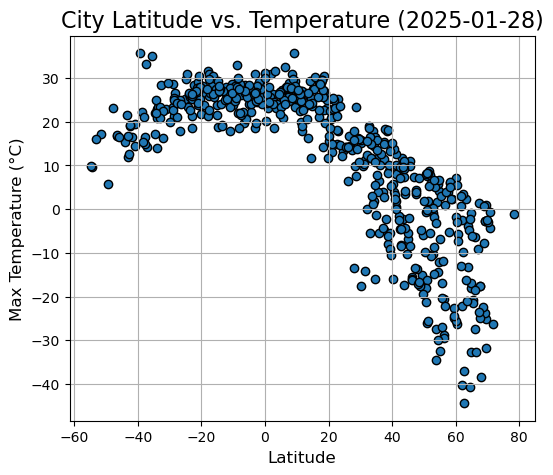

In [ ]:
# Build scatter plot for latitude vs. temperature
#formula
plt.figure(figsize=(6, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black") #c="blue", edgecolors="black", alpha=0.75)

#other graph details
plt.title("City Latitude vs. Temperature (%s)" % time.strftime('%Y-%m-%d'), fontsize=16) #(%s) allows the date format to run properly
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid()
#  plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

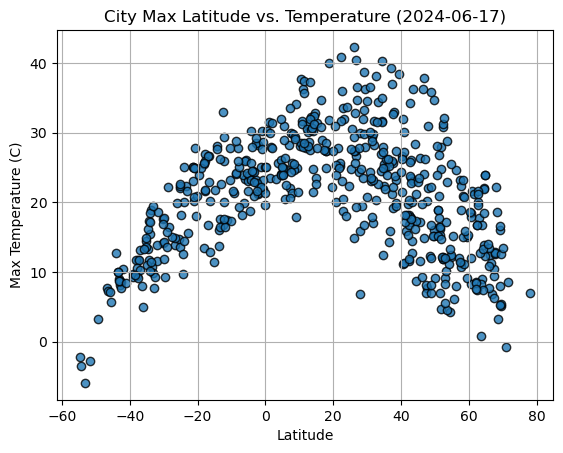

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

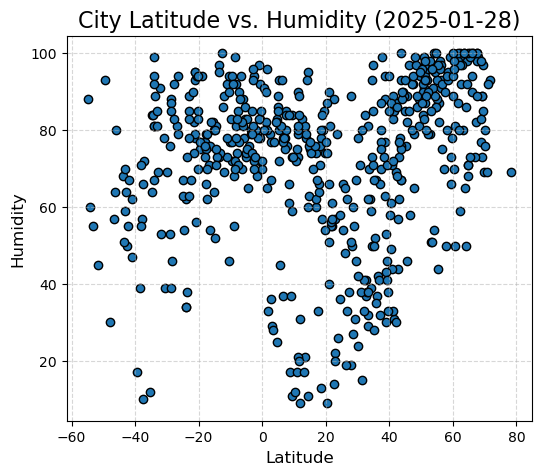

In [67]:
plt.figure(figsize=(6, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

#other graph details
plt.title("City Latitude vs. Humidity (%s)" % time.strftime('%Y-%m-%d'), fontsize=16) #% time.strftime('%Y-%m-%d') gives the date you are running automatically
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

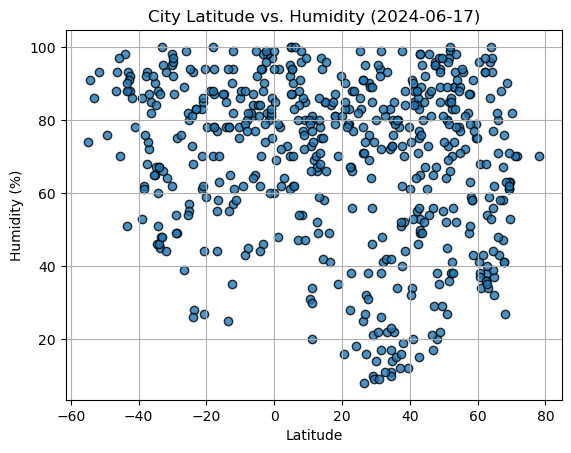

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

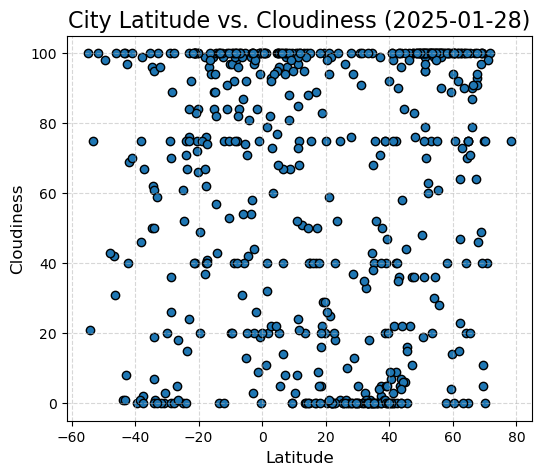

In [69]:
plt.figure(figsize=(6, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

#other graph details
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime('%Y-%m-%d'), fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

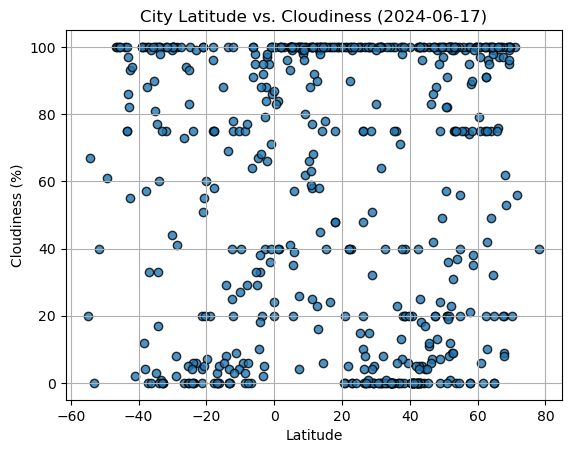

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

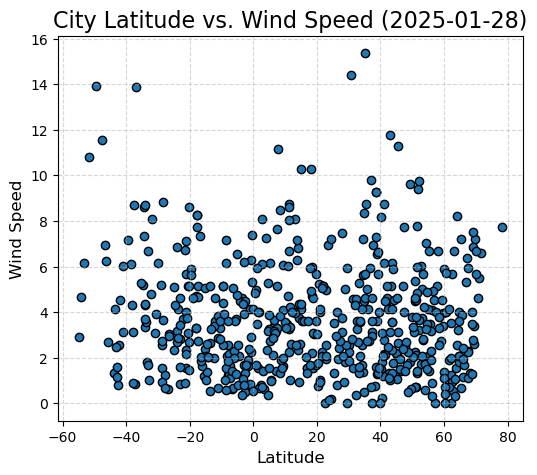

In [70]:
plt.figure(figsize=(6, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

#other graph details
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime('%Y-%m-%d'), fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

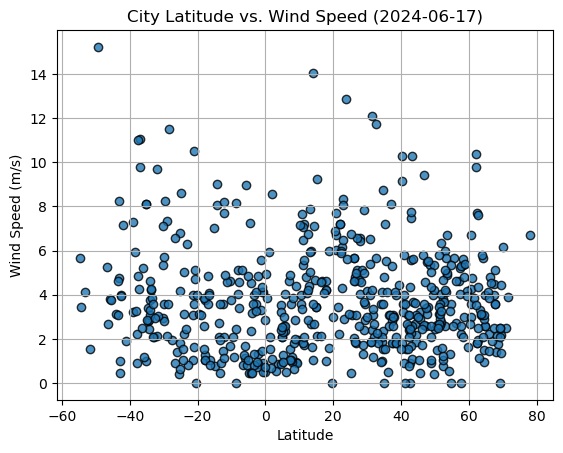

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
# Run linear regression
def line_function(x_value, y_value, coordinate, label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # return regress_values, line_eq
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, 'r-')
    plt.annotate(line_eq, coordinate, fontsize=15, color='red')
    plt.xlabel('Lat')
    plt.ylabel(label)
    plt.title(f'Latitude vs {label}')
    print(f'The r^2 value is: {rvalue**2}')
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hermi_df = city_data_df.loc[(city_data_df['Lat'] >=0)]

# Display sample data
northern_hermi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,st. john's,47.5649,-52.7093,4.43,92,100,4.02,CA,1738098733
3,nemuro,43.3236,145.5750,-2.13,78,5,5.13,JP,1738098735
4,rawai,7.7797,98.3253,26.31,76,96,11.15,TH,1738098736
5,yellowknife,62.4560,-114.3525,-9.71,92,100,5.66,CA,1738098737
7,semdinli,37.3051,44.5742,-4.74,80,2,3.14,TR,1738098739


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hermi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hermi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770
6,machico,32.7000,-16.7667,20.40,81,40,5.66,PT,1718607772
8,howrah,22.5892,88.3103,36.00,67,40,6.17,IN,1718607544


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hermi_df = city_data_df.loc[(city_data_df['Lat'] <0)]

# Display sample data
southern_hermi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paita,-5.0892,-81.1144,24.03,73,92,6.53,PE,1738098732
2,nova vicosa,-17.8919,-39.3719,26.75,77,99,4.69,BR,1738098734
6,uturoa,-16.7333,-151.4333,28.06,71,96,7.36,PF,1738098738
9,grytviken,-54.2811,-36.5092,9.62,60,21,4.64,GS,1738098773
12,edinburgh of the seven seas,-37.0676,-12.3116,14.28,72,67,13.86,SH,1738098776


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hermi_df = city_data_df.loc[(city_data_df['Lat'] <0)]

# Display sample data
southern_hermi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
5,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1718607771
7,port lincoln,-34.7333,135.8667,13.27,67,100,3.38,AU,1718607773
9,leava,-14.3000,-178.1667,28.10,85,8,8.07,WF,1718607775


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Run linear regression #the same as above
def line_function(x_value, y_value)
    x_values = census_data_complete["Temperature"].astype("float")
    y_values = census_data_complete["Latitude"].astype("float")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq
# Print r square value

print(f"R squared: {rvalue**2}")

In [ ]:
#already set above
# line, annotation = line_function(northern_hermi_df['Lat'], northern_hermi_df['Max Temp'])
# plt.scatter(northern_hermi_df['Lat'], northern_hermi_df['Max Temp'])
# plt.plot(northern_hermi_df['Lat'], line, "r-")

# #labels
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature')
# plt.title(f"Latitude vs Max Temp")
# plt.annotate(annotation, (10,-30), fontsize=15, color="red")
# plt.show()

The r^2 value is: 0.6819729395390197


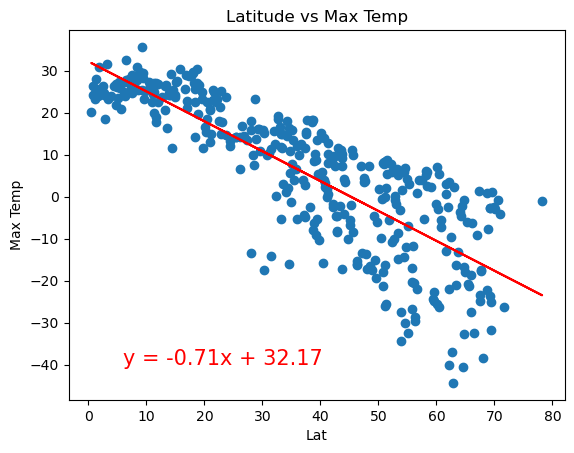

In [ ]:
# Linear regression on Northern Hemisphere
line_function(northern_hermi_df['Lat'], northern_hermi_df['Max Temp'], (6,-40), 'Max Temp')

The r^2-value is: 0.3940754297489331


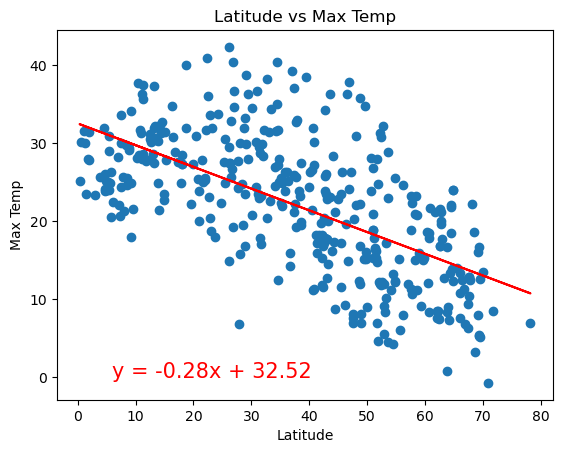

In [ ]:
# Linear regression on Northern Hemisphere
line_function(northern_hermi_df['Lat'], northern_hermi_df['Max Temp'], (6,0), 'Max Temp')

In [ ]:
line, annotation = line_function(southern_hermi_df['Lat'], southern_hermi_df['Max Temp'])
plt.scatter(southern_hermi_df['Lat'], southern_hermi_df['Max Temp'])
plt.plot(southern_hermi_df['Lat'], line, "r-")

#labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f"Latitude vs Max Temp")
plt.annotate(annotation, (10,-30), fontsize=15, color="red")
plt.show()

The r^2 value is: 0.3070009823333153


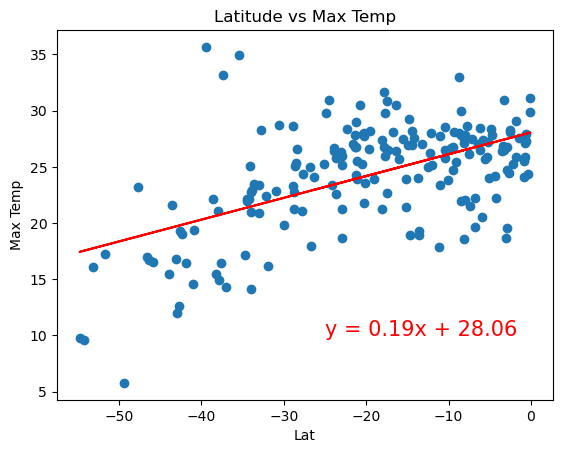

In [ ]:
# Linear regression on Southern Hemisphere
line_function(southern_hermi_df['Lat'], southern_hermi_df['Max Temp'], (-25,10), 'Max Temp')

The r^2-value is: 0.6720220238897325


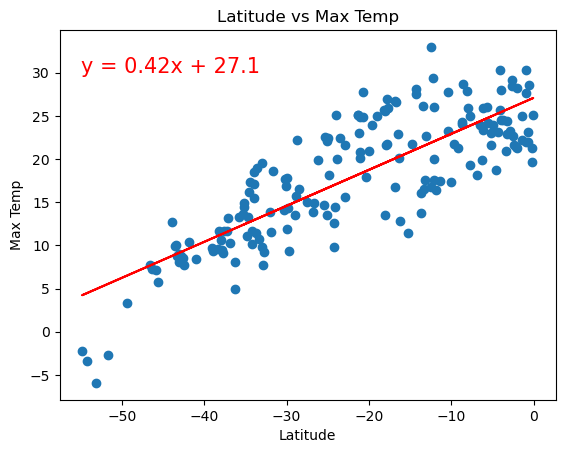

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** the relationships between the two hemispheres present a good correlation between the x and y variables, meaning the y-variables has low variance with the independant variable (x-value).

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
def line_function(x_value, y_value, coordinate, label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # return regress_values, line_eq
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, 'r-')
    plt.annotate(line_eq, coordinate, fontsize=15, color='red')
    plt.xlabel('Lat')
    plt.ylabel(label)
    plt.title(f'Latitude vs {label}')
    print(f'The r^2 value is: {rvalue**2}')
    plt.show()

In [ ]:
# line, annotation = line_function(northern_hermi_df['Lat'], northern_hermi_df['Humidity'])
# plt.scatter(northern_hermi_df['Lat'], northern_hermi_df['Humidity'])
# plt.plot(northern_hermi_df['Lat'], line, "r-")

# #labels
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.title(f"Latitude vs Humidity")
# plt.annotate(annotation, (10,-30), fontsize=15, color="red")
# plt.show()

The r^2 value is: 0.15148715753149167


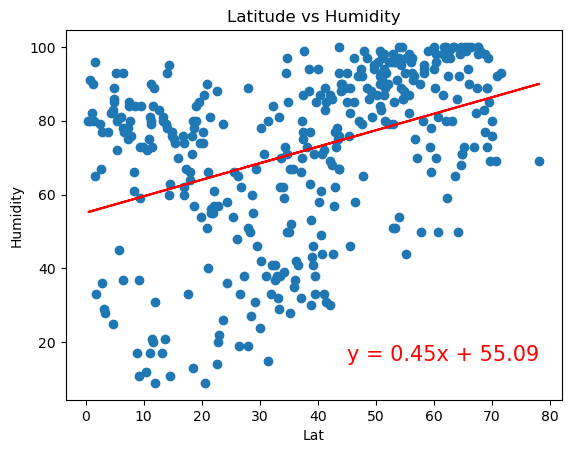

In [36]:
# Northern Hemisphere
line_function(northern_hermi_df['Lat'], northern_hermi_df['Humidity'], (45,15), 'Humidity')

The r^2-value is: 0.007659599322853922


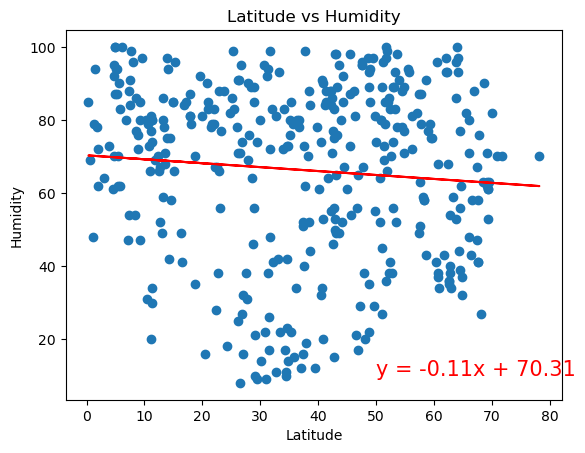

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2 value is: 0.14955489639767322


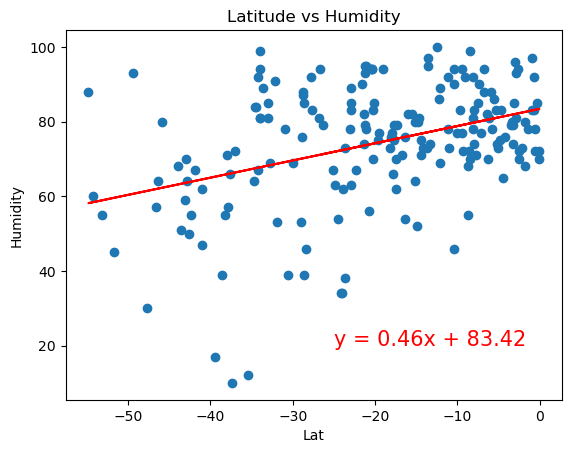

In [ ]:
# Southern Hemisphere
line_function(southern_hermi_df['Lat'], southern_hermi_df['Humidity'], (-25,20), 'Humidity')

The r^2-value is: 0.00014367159540169783


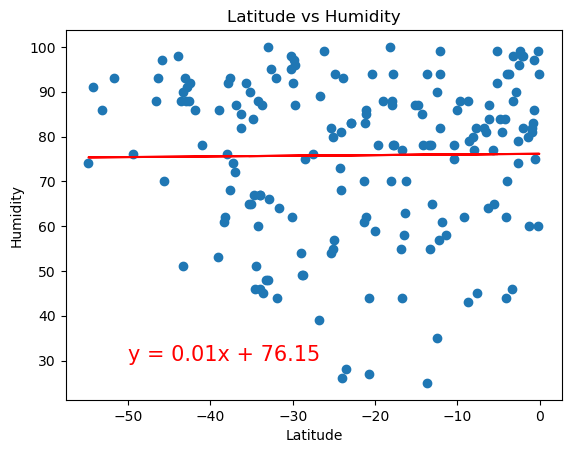

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** The two graphs with the hemisphers are pretty close so that can imply the the variability between the hemispheres are very close to each other, but also lands on the more variability with respect to the independant varaiable. The two ghraphs don't show the best line of fit based off the r^2 value.

### Cloudiness vs. Latitude Linear Regression Plot

In [40]:
def line_function(x_value, y_value, coordinate, label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # return regress_values, line_eq
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, 'r-')
    plt.annotate(line_eq, coordinate, fontsize=15, color='red')
    plt.xlabel('Lat')
    plt.ylabel(label)
    plt.title(f'Latitude vs {label}')
    print(f'The r^2 value is: {rvalue**2}')
    plt.show()

The r^2 value is: 0.02358288395159319


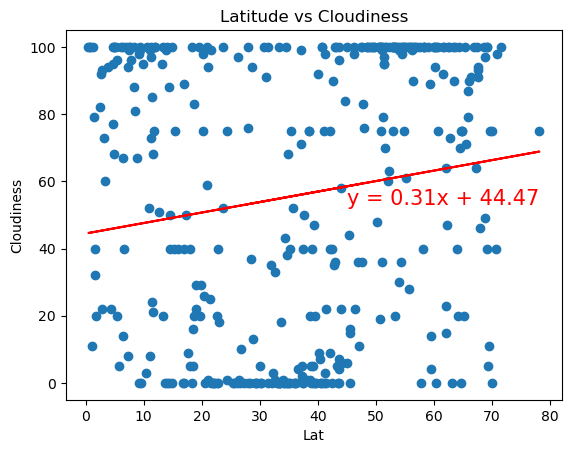

In [48]:
# Northern Hemisphere
line_function(northern_hermi_df['Lat'], northern_hermi_df['Cloudiness'], (45,53), 'Cloudiness')

The r^2-value is: 0.006456908379763574


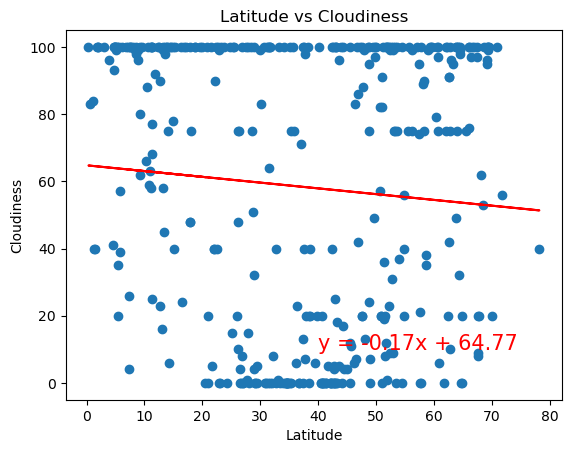

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2 value is: 0.04491877477207728


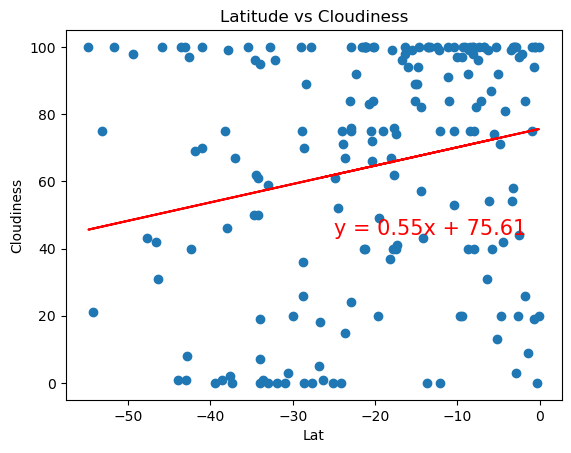

In [51]:
# Southern Hemisphere
line_function(southern_hermi_df['Lat'], southern_hermi_df['Cloudiness'], (-25,44), 'Cloudiness')

The r^2-value is: 0.018616831531634456


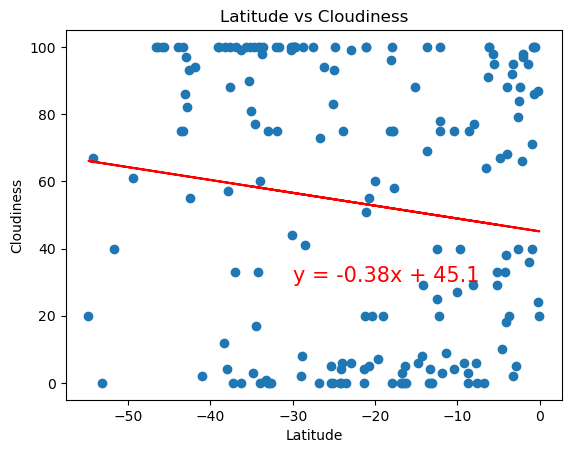

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** Both graphs show very high variances with the independant and depandant variables are their r^2 values are significantly low. It's easy to see that the best line of fit for both really doesn't really follow the majority of the plotted values, they are all scattered on the graph.

### Wind Speed vs. Latitude Linear Regression Plot

In [52]:
def line_function(x_value, y_value, coordinate, label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # return regress_values, line_eq
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, 'r-')
    plt.annotate(line_eq, coordinate, fontsize=15, color='red')
    plt.xlabel('Lat')
    plt.ylabel(label)
    plt.title(f'Latitude vs {label}')
    print(f'The r^2 value is: {rvalue**2}')
    plt.show()

The r^2 value is: 0.0013436534908516234


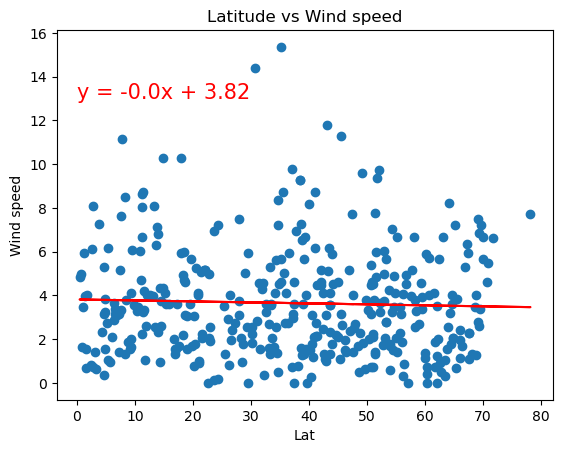

In [55]:
# Northern Hemisphere
line_function(northern_hermi_df['Lat'], northern_hermi_df['Wind Speed'], (0,13), 'Wind speed')

The r^2-value is: 0.0017236249523139959


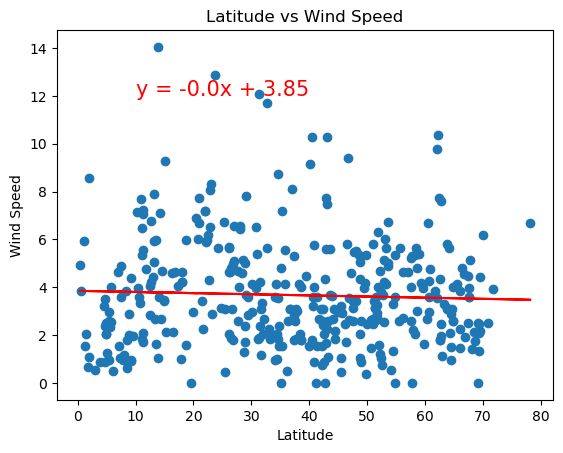

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2 value is: 0.10321694501660121


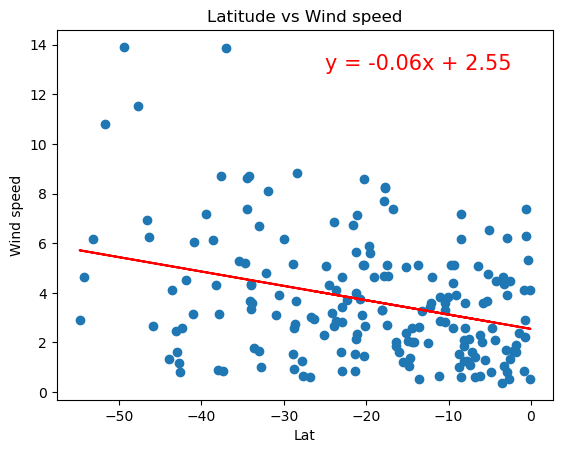

In [57]:
#Southern Hermisphere
line_function(southern_hermi_df['Lat'], southern_hermi_df['Wind Speed'], (-25,13), 'Wind speed')

The r^2-value is: 0.06495869418886388


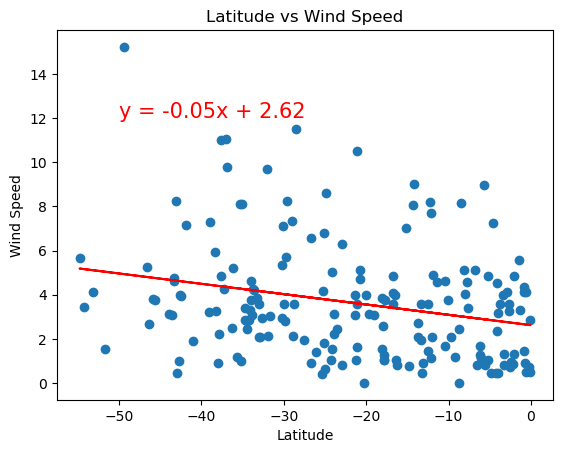

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** Just visually, you can see that there aren't that many outliers presented in both graphs, but their r^2 values would state otherwise. Meaning there is more variance in teh northern hemisphere based off of it's r^2 value, when the graph looks like all the plots are pretty well within each other. On the other hand, the southern hemisphere, while also showing a rather low r^2 value, provides the conclusion that there is less varaiance beteen the two variables calculated than the northern hemisphere, even though to me, it looks like it has more outliers than the northern hemisphere.